## CypReact

In [29]:
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
from rdkit import Chem
from rdkit.Chem.Descriptors import ExactMolWt

In [30]:
frame = PandasTools.LoadSDF('./CypReact_Training_Set.sdf',smilesName='SMILES',molColName='Molecule',includeFingerprints=True, removeHs=False, strictParsing=True)
test_frame=PandasTools.LoadSDF('./CypReact_Testing_Set.sdf',smilesName='SMILES',molColName='Molecule',includeFingerprints=True, removeHs=False, strictParsing=True)

,Name,InChIKey,PubChem_CID,CYP1A2,CYP2A6,CYP2B6,CYP2C8,CYP2C9,CYP2C19,CYP2D6,CYP2E1,CYP3A4,References,Comments,ID,SMILES,Molecule
0,(R)-Acenocoumarol,VABCILAOYCMVPS-UHFFFAOYSA-N,54676537,R,Unknown,Unknown,Unknown,R,R,Unknown,Unknown,Unknown,"Zhou SF, Zhou ZW, Yang LP, Cai JP: Substrates,...",,CC01632,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,
1,Monodemethylated mifepristone,IBLXOBHABOVXDY-MSYUBAPHSA-N,44514117,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,R,"Brown CM, Reisfeld B, Mayeno AN: Cytochromes P...",,CC01633,CC#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4=C3C(c3ccc(NC...,
2,3'-HPPH,FSPRLRPJSPWQNC-UHFFFAOYSA-N,91597,Unknown,Unknown,Unknown,Unknown,R,R,Unknown,Unknown,Unknown,"Zhou SF, Zhou ZW, Yang LP, Cai JP: Substrates,...",,CC01634,O=C1NC(=O)C(c2ccccc2)(c2cccc(O)c2)N1,
3,Citalopram,WSEQXVZVJXJVFP-UHFFFAOYSA-N,2771,Unknown,Unknown,Unknown,Unknown,Unknown,R,R,Unknown,R,"Zhou SF, Zhou ZW, Yang LP, Cai JP: Substrates,...",,CC01635,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,
4,O-Demethylencainide,QMHJFCPHRGVEAF-UHFFFAOYSA-N,54736,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,R,Unknown,Unknown,"Zhou S (2016). Cytochrome P450 2D6: Structure,...",,CC01636,[CH3:1][N:2]1[CH2:3][CH2:4][CH2:5][CH2:6][CH:7...,

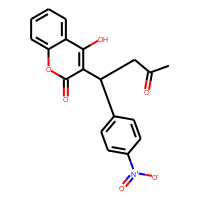
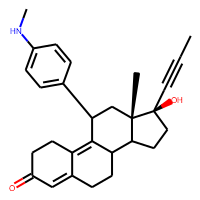
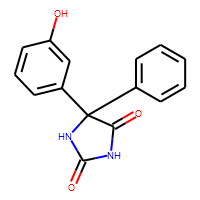
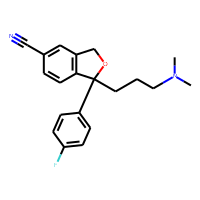
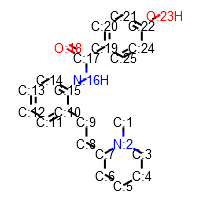

In [31]:
frame.head()
test_frame.head()

In [32]:
frame=frame.drop(['References','Comments','PubChem_CID','Molecule','ID'],axis=1)
frame=frame.replace(['N'],0)
frame=frame.replace(['Unknown'],0)
frame=frame.replace(['R'],1)
test_frame=test_frame.drop(['References','Comments','PubChem_CID','Molecule','ID'],axis=1)
test_frame=test_frame.replace(['N'],0)
test_frame=test_frame.replace(['Unknown'],0)
test_frame=test_frame.replace(['R'],1)


In [33]:
train_mol_atom=[]
train_val_e=[]
train_rd_e=[]
train_fpd=[]
train_max_pc=[]
train_mol_weights=[]


test_mol_atom=[]
test_val_e=[]
test_rd_e=[]
test_fpd=[]
test_max_pc=[]
test_mol_weights=[]

for x in frame['SMILES']:
    m=Chem.MolFromSmiles(str(x))
    train_mol_atom.append(m.GetNumAtoms())
    train_mol_weights.append(Chem.Descriptors.ExactMolWt(m))
    train_fpd.append(Chem.Descriptors.FpDensityMorgan1(m))
    train_rd_e.append(Chem.Descriptors.NumRadicalElectrons(m))
    train_val_e.append(Chem.Descriptors.NumValenceElectrons(m))
    train_max_pc.append(Chem.Descriptors.MaxAbsPartialCharge(m))
    
for y in test_frame['SMILES']:
    m=Chem.MolFromSmiles(str(y))
    test_mol_atom.append(m.GetNumAtoms())
    test_mol_weights.append(Chem.Descriptors.ExactMolWt(m))
    test_fpd.append(Chem.Descriptors.FpDensityMorgan1(m))
    test_rd_e.append(Chem.Descriptors.NumRadicalElectrons(m))
    test_val_e.append(Chem.Descriptors.NumValenceElectrons(m))
    test_max_pc.append(Chem.Descriptors.MaxAbsPartialCharge(m))
    
    
     


frame.insert(2,'Mol Wt',train_mol_weights,True)
frame.insert(2,'FP Density',train_fpd,True)
frame.insert(2,'Valence Electrons',train_val_e,True)
frame.insert(2,'Num of Atoms',train_mol_atom,True)
frame.insert(2,'Max Partial_Charge',train_max_pc,True)

test_frame.insert(2,'Mol Wt',test_mol_weights,True)
test_frame.insert(2,'FP Density',test_fpd,True)
test_frame.insert(2,'Valence Electrons',test_val_e,True)
test_frame.insert(2,'Num of Atoms',test_mol_atom,True)
test_frame.insert(2,'Max Partial_Charge',test_max_pc,True)


In [35]:
frame.head(50)
test_frame.head(50)

,Name,InChIKey,Max Partial_Charge,Num of Atoms,Valence Electrons,FP Density,Mol Wt,CYP1A2,CYP2A6,CYP2B6,CYP2C8,CYP2C9,CYP2C19,CYP2D6,CYP2E1,CYP3A4,SMILES
0,(R)-Acenocoumarol,VABCILAOYCMVPS-UHFFFAOYSA-N,0.506592,26,132,1.192308,353.089937,1,0,0,0,1,1,0,0,0,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...
1,Monodemethylated mifepristone,IBLXOBHABOVXDY-MSYUBAPHSA-N,0.388122,31,162,1.129032,415.251129,0,0,0,0,0,0,0,0,1,CC#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4=C3C(c3ccc(NC...
2,3'-HPPH,FSPRLRPJSPWQNC-UHFFFAOYSA-N,0.507954,20,100,0.900000,268.084792,0,0,0,0,1,1,0,0,0,O=C1NC(=O)C(c2ccccc2)(c2cccc(O)c2)N1
3,Citalopram,WSEQXVZVJXJVFP-UHFFFAOYSA-N,0.360840,24,124,1.208333,324.163792,0,0,0,0,0,1,1,0,1,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
4,O-Demethylencainide,QMHJFCPHRGVEAF-UHFFFAOYSA-N,0.507966,25,132,1.160000,338.199428,0,0,0,0,0,0,1,0,0,[CH3:1][N:2]1[CH2:3][CH2:4][CH2:5][CH2:6][CH:7...
5,Gliclazide,BOVGTQGAOIONJV-UHFFFAOYSA-N,0.342704,22,120,1.136364,323.130363,0,0,0,0,1,1,0,0,0,Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CCCC3C2)cc1
6,"4,4'-Dichlorobiphenyl",YTBRNEUEFCNVHC-UHFFFAOYSA-N,0.084344,14,70,0.500000,222.000306,1,0,0,0,0,0,0,0,0,Clc1ccc(-c2ccc(Cl)cc2)cc1
7,Tegafur,WFWLQNSHRPWKFK-UHFFFAOYSA-N,0.357865,14,76,1.571429,200.059720,1,1,0,1,0,0,0,0,0,O=c1[nH]c(=O)n(C2CCCO2)cc1F
8,Buprenorphine,RMRJXGBAOAMLHD-IBGIGPMDSA-N,0.504247,34,186,1.147059,467.303559,0,0,0,1,1,0,0,0,1,CO[C@]12CC[C@@]3(CC1[C@](C)(O)C(C)(C)C)C1Cc4cc...
9,"2,6-Xylidine",UFFBMTHBGFGIHF-UHFFFAOYSA-N,0.398299,9,48,1.111111,121.089149,0,1,0,0,0,0,0,1,0,Cc1cccc(C)c1N


In [37]:
train_x=frame.iloc[:,2:7]
train_y=frame.iloc[:,7]

test_x=frame.iloc[:,2:7]
test_y=frame.iloc[:,7]

In [38]:
from sklearn.ensemble import RandomForestClassifier
modelCyp1=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
modelCyp1.fit(train_x,train_y)

ypred=modelCyp1.predict(test_x)



In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,ypred)
cm

array([[1360,    0],
       [   6,  265]], dtype=int64)

In [42]:
modelCyp1.score(test_x,test_y)

0.9963212752912324

TypeError: 'float' object cannot be interpreted as an integer